In [1]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


In [2]:
import pandas as pd
df = pd.read_csv("hotel_bookings.csv")

**Phase 1: Exploratory Data Analysis (EDA) & Data Quality Report**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings as wr
wr.filterwarnings('ignore')

**1.1 Read Dataset**

In [4]:
print(f"Dataset shape: {df.shape}") #(rows , columns)

Dataset shape: (119390, 32)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [7]:
df.columns.tolist()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

**1.2 Check for missing and duplicate values**

In [8]:
print(f"Missing Values:\n \n{df.isnull().sum()}")

Missing Values:
 
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              1634

In [9]:
print(f"Dupilcate values:\n \n{df.nunique()}")

Dupilcate values:
 
hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_

**1.3 Create Visualizations for Missing Values**

<Figure size 1200x800 with 0 Axes>

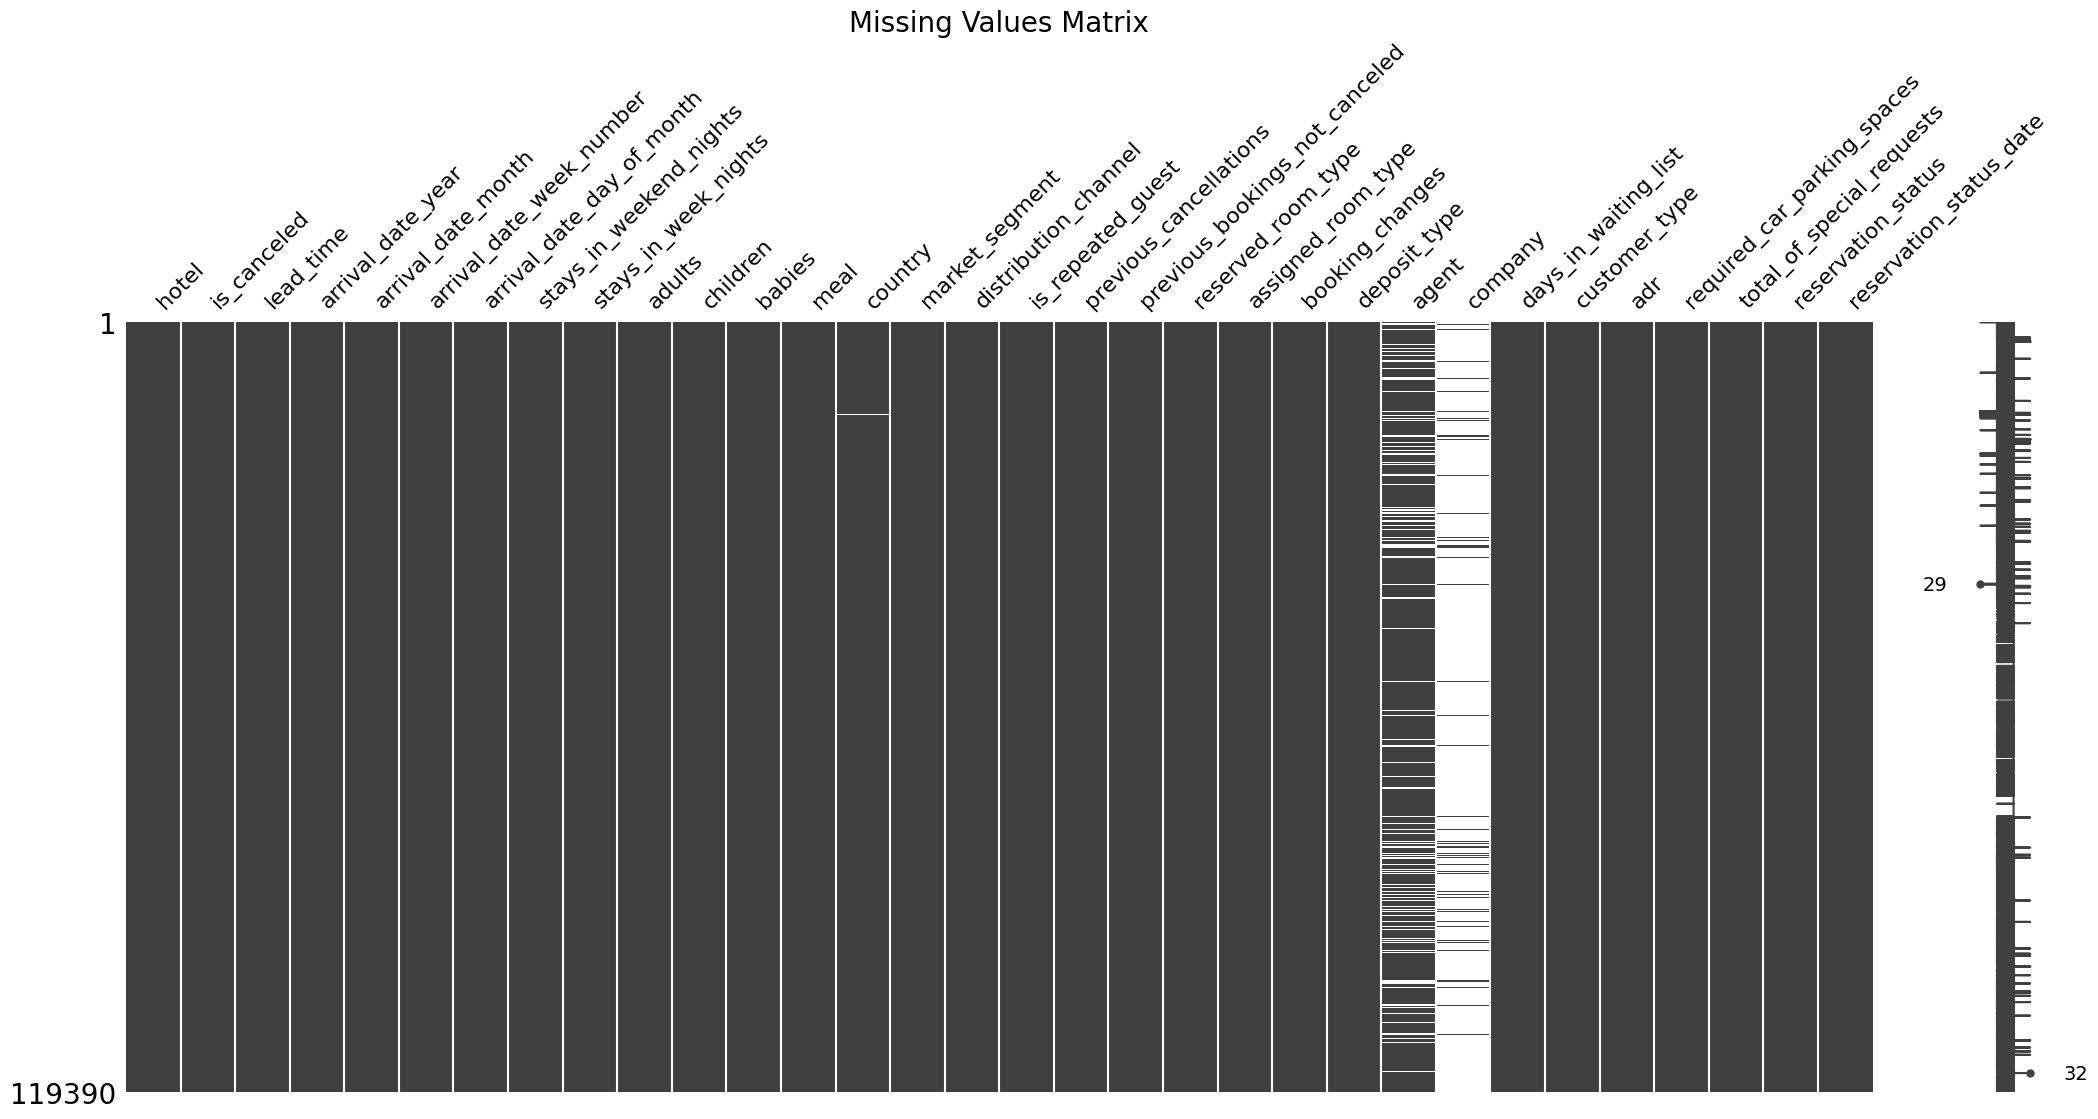

In [10]:
plt.figure(figsize=(12, 8))
msno.matrix(df)
plt.title('Missing Values Matrix', fontsize=20)
plt.tight_layout()
plt.savefig('missing_values_matrix.png', dpi=500, bbox_inches='tight')
plt.show()

**1.4 Detect Outliers**

In [11]:
# Get all numerical columns first
numerical_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_columns_int = df.select_dtypes(include=['int64']).columns.tolist()
numerical_columns_float = df.select_dtypes(include=['float64']).columns.tolist()
print(f"Numerical Columns: {numerical_columns}")
print(f"No. of Numerical Columns: {len(numerical_columns)}")
print("--------------------------")
print(f"Numerical Columns (int): {numerical_columns_int}")
print(f"Numerical Columns (float): {numerical_columns_float}")
print("--------------------------")

Numerical Columns: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
No. of Numerical Columns: 20
--------------------------
Numerical Columns (int): ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']
Numerical Columns (float): ['children', 'agent', 'company', 'adr']
--------------------------


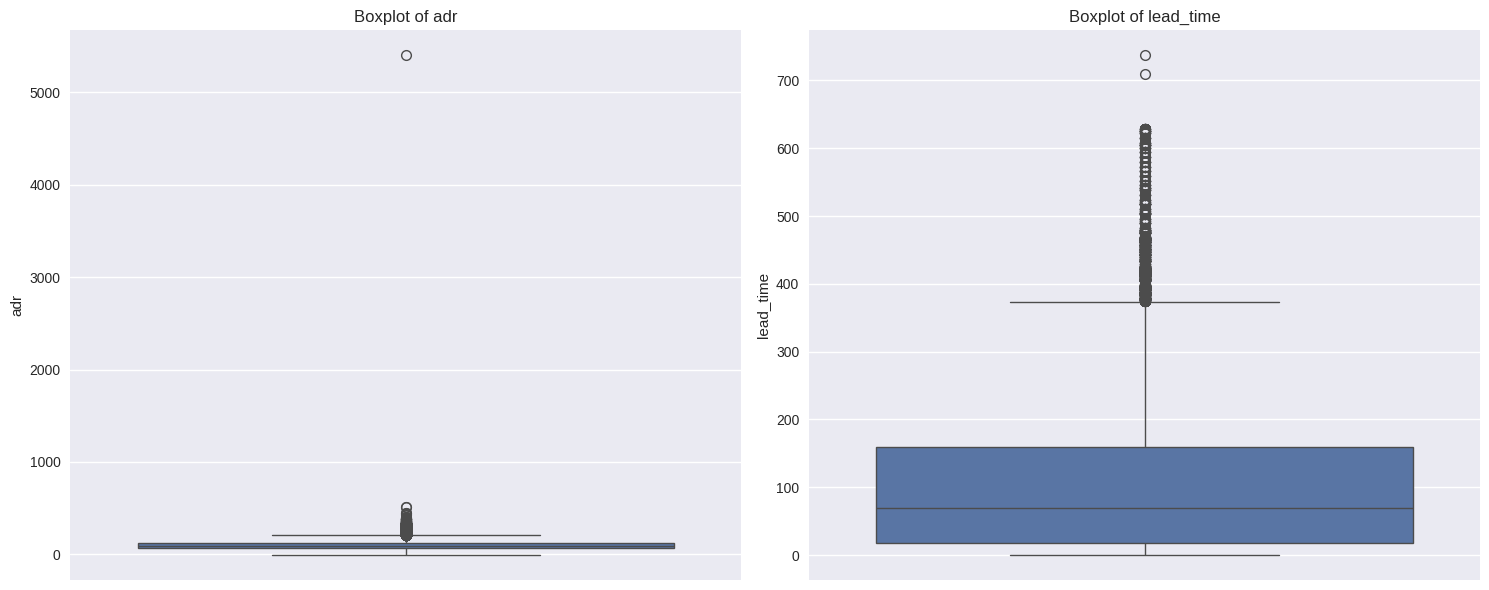

In [12]:
# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot for adr
sns.boxplot(y=df['adr'], ax=axes[0])
axes[0].set_title('Boxplot of adr')
axes[0].set_ylabel('adr')

# Boxplot for lead_time
sns.boxplot(y=df['lead_time'], ax=axes[1])
axes[1].set_title('Boxplot of lead_time')
axes[1].set_ylabel('lead_time')

plt.tight_layout()
plt.show()

In [13]:
adr_Q1 = df['adr'].quantile(0.25)
adr_Q3 = df['adr'].quantile(0.75)

lead_time_Q1 = df['lead_time'].quantile(0.25)
lead_time_Q3 = df['lead_time'].quantile(0.75)

adr_IQR = adr_Q3 - adr_Q1
lead_time_IQR = lead_time_Q3 - lead_time_Q1

loweradr = adr_Q1 - 1.5 * adr_IQR
upperadr = adr_Q3 + 1.5 * adr_IQR

lowerleadtime = lead_time_Q1 - 1.5 * lead_time_IQR
upperleadtime = lead_time_Q3 + 1.5 * lead_time_IQR

outliers_adr = df[(df['adr'] < loweradr) | (df['adr'] > upperadr)]
outliers_leadtime = df[(df['lead_time'] < lowerleadtime) | (df['lead_time'] > upperleadtime)]

print('Number of outliers in adr is', len(outliers_adr))
print('Number of outliers in lead_time is', len(outliers_leadtime))

Number of outliers in adr is 3793
Number of outliers in lead_time is 3005


**1.5 Documentation**

Dataset it contains (119390 rows and 32 columns)

Missing Values:

1.   children -> 4
2.   country -> 488
3.   agent -> 16340
4.   company -> 112593










**Phase 2: Data Cleaning**

In [14]:
missing_values = df.isnull().sum()
total_cells = np.prod(df.shape)
total_missing = missing_values.sum()

prcnt_missing = (total_missing/total_cells) * 100
print(f"total of all values: {total_cells}")
print(f"total of the missing values: {total_missing}")
print(f"Precentage of missing values: {prcnt_missing}%")

total of all values: 3820480
total of the missing values: 129425
Precentage of missing values: 3.387663330262166%


**2.1 Handle Missing Values**

lets remove columns with at least one missing value



In [15]:
df_columns_na_drop = df.dropna(axis=1)

print(f"Columns in original dataset: {df.shape[1]}")
print(f"Columns with na's dropped: {df_columns_na_drop.shape[1]}")
print(f"dropped columns are company , agent , country and children")

Columns in original dataset: 32
Columns with na's dropped: 28
dropped columns are company , agent , country and children


**2.2 Fill in missing values automatically**

In [16]:
df['company'] = df['company'].fillna(0).astype('float64')
df['agent'] = df['agent'].fillna(0).astype('float64')

print(df[['company', 'agent']].isnull().sum())
print("\nCompany value counts:")
print(df['company'].value_counts().head())
print("\nAgent value counts:")
print(df['agent'].value_counts().head())

company    0
agent      0
dtype: int64

Company value counts:
company
0.0      112593
40.0        927
223.0       784
67.0        267
45.0        250
Name: count, dtype: int64

Agent value counts:
agent
9.0      31961
0.0      16340
240.0    13922
1.0       7191
14.0      3640
Name: count, dtype: int64


In [17]:
df['country'] = df['country'].fillna("Unknown")
print(df['country'].isnull().sum())
print("\nCountry value counts:")
print(df['country'].value_counts()[0:25])

0

Country value counts:
country
PRT        48590
GBR        12129
FRA        10415
ESP         8568
DEU         7287
ITA         3766
IRL         3375
BEL         2342
BRA         2224
NLD         2104
USA         2097
CHE         1730
CN          1279
AUT         1263
SWE         1024
CHN          999
POL          919
ISR          669
RUS          632
NOR          607
ROU          500
Unknown      488
FIN          447
DNK          435
AUS          426
Name: count, dtype: int64


In [18]:
print(df['children'].describe())
print("\nValue counts:")
print(df['children'].value_counts())

median_children = df['children'].median()
print(f"\nThe median number of children is: {median_children}")

df['children'] = df['children'].fillna(median_children)

df['children'] = df['children'].round().astype('int64')

print(df['children'].isnull().sum())

count    119386.000000
mean          0.103890
std           0.398561
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: children, dtype: float64

Value counts:
children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

The median number of children is: 0.0
0


**2.2 Remove Duplicates**

In [19]:
duplicate_rows = df[df.duplicated(keep=False)]
print(f"\nNumber of duplicate rows: {len(duplicate_rows)}")


Number of duplicate rows: 40165


In [20]:
if not duplicate_rows.empty:
    print("\nSample of duplicate rows:")
    print(duplicate_rows.head().to_string())


Sample of duplicate rows:
           hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  adults  children  babies meal country market_segment distribution_channel  is_repeated_guest  previous_cancellations  previous_bookings_not_canceled reserved_room_type assigned_room_type  booking_changes deposit_type  agent  company  days_in_waiting_list customer_type     adr  required_car_parking_spaces  total_of_special_requests reservation_status reservation_status_date
4   Resort Hotel            0         14               2015               July                        27                          1                        0                     2       2         0       0   BB     GBR      Online TA                TA/TO                  0                       0                               0                  A                  A                0   No Deposit  240.0      0.0     

In [21]:
df.drop_duplicates(keep='first', inplace=True)
print(f"\nShape of the DataFrame after dropping duplicates: {df.shape}")


Shape of the DataFrame after dropping duplicates: (87396, 32)


**2.3 Handle Outliers**

In [23]:
df['adr_original'] = df['adr'].copy()

df['adr'] = df['adr'].apply(lambda x: min(x, 1000))

In [26]:
# Validate the treatment
print("VALIDATION CHECKS:")
print("=" * 50)
print(f"Maximum ADR after capping: {df['adr'].max()}")
print(f"Number of capped values: {len(df[df['adr_original'] > 1000])}")
print(f"Data integrity check: {len(df) == len(df.dropna())}")

assert df['adr'].max() <= 1000, "Values above cap detected"

VALIDATION CHECKS:
Maximum ADR after capping: 1000.0
Number of capped values: 1
Data integrity check: True


In [30]:
df["adr"][0:30]

,adr
0,0.00
1,0.00
2,75.00
3,75.00
4,98.00
6,107.00
7,103.00
8,82.00
9,105.50
10,123.00


In [39]:
def convert_date_columns(df):

    conversion_results = {}

    date_formats = ['%Y-%m-%d', '%d/%m/%Y', '%m/%d/%Y', '%Y.%m.%d',
                   '%d-%m-%Y', '%m-%d-%Y', '%Y%m%d']

    for col in date_columns:
        if col in df.columns:
            original_dtype = df[col].dtype
            original_sample = df[col].head(3).tolist()

            try:

                df[col] = pd.to_datetime(df[col], errors='coerce')

                if df[col].isnull().all():
                    for fmt in date_formats:
                        try:
                            df[col] = pd.to_datetime(df[col], format=fmt, errors='coerce')
                            if not df[col].isnull().all():
                                break
                        except:
                            continue

                conversion_results[col] = {
                    'success': not df[col].isnull().all(),
                    'original_dtype': str(original_dtype),
                    'new_dtype': str(df[col].dtype),
                    'missing_after_conversion': df[col].isnull().sum(),
                    'original_sample': original_sample,
                    'converted_sample': df[col].head(3).tolist()
                }

            except Exception as e:
                conversion_results[col] = {
                    'success': False,
                    'error': str(e),
                    'original_dtype': str(original_dtype)
                }

    return df, conversion_results

df, conversion_results = convert_date_columns(df)

print("DATE CONVERSION RESULTS:")
print("=" * 50)
for col, result in conversion_results.items():
    print(f"Column: {col}")
    if result.get('success', False):
        print(f"  ✓ Successfully converted from {result['original_dtype']} to {result['new_dtype']}")
        print(f"  Missing values: {result['missing_after_conversion']}")
        print(f"  Before: {result['original_sample']}")
        print(f"  After: {result['converted_sample']}")
    else:
        print(f"  ✗ Failed to convert: {result.get('error', 'Unknown error')}")
    print("-" * 40)

DATE CONVERSION RESULTS:
Column: lead_time
  ✓ Successfully converted from datetime64[ns] to datetime64[ns]
  Missing values: 0
  Before: [Timestamp('1970-01-01 00:00:00.000000342'), Timestamp('1970-01-01 00:00:00.000000737'), Timestamp('1970-01-01 00:00:00.000000007')]
  After: [Timestamp('1970-01-01 00:00:00.000000342'), Timestamp('1970-01-01 00:00:00.000000737'), Timestamp('1970-01-01 00:00:00.000000007')]
----------------------------------------
Column: arrival_date_year
  ✓ Successfully converted from datetime64[ns] to datetime64[ns]
  Missing values: 0
  Before: [Timestamp('1970-01-01 00:00:00.000002015'), Timestamp('1970-01-01 00:00:00.000002015'), Timestamp('1970-01-01 00:00:00.000002015')]
  After: [Timestamp('1970-01-01 00:00:00.000002015'), Timestamp('1970-01-01 00:00:00.000002015'), Timestamp('1970-01-01 00:00:00.000002015')]
----------------------------------------
Column: arrival_date_month
  ✗ Failed to convert: Unknown error
----------------------------------------
Colu

In [40]:
print("FINAL DATA TYPE VERIFICATION:")
print("=" * 50)

date_cols_final = [col for col in df.columns if 'date' in col.lower() or df[col].dtype == 'datetime64[ns]']
print(f"Date-related columns after processing: {date_cols_final}")

for col in date_cols_final:
    print(f"{col}: {df[col].dtype}")
    print(f"Range: {df[col].min()} to {df[col].max()}")
    print(f"Missing: {df[col].isnull().sum()}")
    print("-" * 30)

print("SUMMARY OF DATE TYPE FIXES:")
print("=" * 50)
print(f"Total date columns processed: {len(date_cols_final)}")
print(f"Columns successfully converted to datetime: {len([col for col in date_cols_final if df[col].dtype == 'datetime64[ns]'])}")
print(f"Derived date features created: {len([col for col in df.columns if any(x in col for x in ['_year', '_month', '_day', '_dayofweek', '_quarter'])])})")

FINAL DATA TYPE VERIFICATION:
Date-related columns after processing: ['lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'reservation_status_date', 'arrival_date']
lead_time: datetime64[ns]
Range: 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000000737
Missing: 0
------------------------------
arrival_date_year: datetime64[ns]
Range: 1970-01-01 00:00:00.000002015 to 1970-01-01 00:00:00.000002017
Missing: 0
------------------------------
arrival_date_month: datetime64[ns]
Range: NaT to NaT
Missing: 87396
------------------------------
arrival_date_week_number: datetime64[ns]
Range: 1970-01-01 00:00:00.000000001 to 1970-01-01 00:00:00.000000053
Missing: 0
------------------------------
arrival_date_day_of_month: datetime64[ns]
Range: 1970-01-01 00:00:00.000000001 to 1970-01-01 00:00:00.000000031
Missing: 0
------------------------------
reservation_status_date: datetime64[ns]
Range: 2014-10-17 00:00:00 to 2017-09-14 00:00:00
Miss

**Phase 3: Feature Engineering & Preprocessing**

**3.1 Create new features**


In [41]:
# Create total_guests
df['total_guests'] = df['adults'] + df['children'].fillna(0) + df['babies']
print(f"total_guests created: range {df['total_guests'].min()} to {df['total_guests'].max()}")
print(f"total_guests distribution:\n{df['total_guests'].value_counts().sort_index()}")
print()

total_guests created: range 0 to 55
total_guests distribution:
total_guests
0       166
1     16072
2     57057
3     10078
4      3870
5       136
6         1
10        2
12        2
20        2
26        5
27        2
40        1
50        1
55        1
Name: count, dtype: int64



In [42]:
# Create total_nights
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
print(f"total_nights created: range {df['total_nights'].min()} to {df['total_nights'].max()}")
print(f"total_nights distribution:\n{df['total_nights'].value_counts().sort_index().head(10)}")
print()

total_nights created: range 0 to 69
total_nights distribution:
total_nights
0      651
1    17184
2    15745
3    17839
4    13575
5     6742
6     3271
7     7527
8     1067
9      780
Name: count, dtype: int64



In [43]:
# Create is_family
df['is_family'] = ((df['children'] > 0) | (df['babies'] > 0)).map({True: 'Yes', False: 'No'})
print(f"is_family distribution:")
print(df['is_family'].value_counts())
print(f"Family bookings percentage: {(df['is_family'] == 'Yes').mean()*100:.2f}%")
print()

is_family distribution:
is_family
No     78293
Yes     9103
Name: count, dtype: int64
Family bookings percentage: 10.42%



In [45]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_original,arrival_date,total_guests,total_nights,is_family
0,Resort Hotel,0,1970-01-01 00:00:00.000000342,1970-01-01 00:00:00.000002015,NaT,1970-01-01 00:00:00.000000027,1970-01-01 00:00:00.000000001,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,0.0,NaT,2,0,No
1,Resort Hotel,0,1970-01-01 00:00:00.000000737,1970-01-01 00:00:00.000002015,NaT,1970-01-01 00:00:00.000000027,1970-01-01 00:00:00.000000001,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,0.0,NaT,2,0,No
2,Resort Hotel,0,1970-01-01 00:00:00.000000007,1970-01-01 00:00:00.000002015,NaT,1970-01-01 00:00:00.000000027,1970-01-01 00:00:00.000000001,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,75.0,NaT,1,1,No
3,Resort Hotel,0,1970-01-01 00:00:00.000000013,1970-01-01 00:00:00.000002015,NaT,1970-01-01 00:00:00.000000027,1970-01-01 00:00:00.000000001,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,75.0,NaT,1,1,No
4,Resort Hotel,0,1970-01-01 00:00:00.000000014,1970-01-01 00:00:00.000002015,NaT,1970-01-01 00:00:00.000000027,1970-01-01 00:00:00.000000001,0,2,2,...,98.0,0,1,Check-Out,2015-07-03,98.0,NaT,2,2,No


In [46]:
print("CATEGORICAL VARIABLES ANALYSIS:")

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

low_card_numeric = []
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].nunique() <= 10:
        low_card_numeric.append(col)

all_potential_categorical = categorical_cols + low_card_numeric

print("Potential categorical variables:")
for col in all_potential_categorical:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")
    if unique_count <= 15:
        print(f"  Values: {df[col].unique()}")
        print(f"  Distribution:\n{df[col].value_counts()}")
    print("-" * 40)

target_columns = ['meal', 'market_segment']
print("\nSPECIFIC TARGET COLUMNS FOR ONE-HOT ENCODING:")
print("=" * 50)

for col in target_columns:
    if col in df.columns:
        print(f"{col}:")
        print(f"  Data type: {df[col].dtype}")
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Value counts:\n{df[col].value_counts()}")
        print(f"  Missing values: {df[col].isnull().sum()}")
    else:
        print(f"Warning: Column '{col}' not found in dataset")
    print("-" * 30)

CATEGORICAL VARIABLES ANALYSIS:
Potential categorical variables:
hotel: 2 unique values
  Values: ['Resort Hotel' 'City Hotel']
  Distribution:
hotel
City Hotel      53428
Resort Hotel    33968
Name: count, dtype: int64
----------------------------------------
meal: 5 unique values
  Values: ['BB' 'FB' 'HB' 'SC' 'Undefined']
  Distribution:
meal
BB           67978
SC            9481
HB            9085
Undefined      492
FB             360
Name: count, dtype: int64
----------------------------------------
country: 178 unique values
----------------------------------------
market_segment: 8 unique values
  Values: ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
  Distribution:
market_segment
Online TA        51618
Offline TA/TO    13889
Direct           11804
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Undefined            2
Name: count, dtype: int64
---------------------------------------

In [50]:
print("\nPREPARING FOR ONE-HOT ENCODING:")

columns_to_encode = []

for col in ['meal', 'market_segment']:
    if col in df.columns and df[col].nunique() <= 15:
        columns_to_encode.append(col)
        print(f" Added {col} for one-hot encoding ({df[col].nunique()} categories)")

for col in all_potential_categorical:
    if col not in columns_to_encode and 2 <= df[col].nunique() <= 10:
        columns_to_encode.append(col)
        print(f" Added {col} for one-hot encoding ({df[col].nunique()} categories)")

print(f"\nTotal columns to one-hot encode: {len(columns_to_encode)}")
print(f"Columns: {columns_to_encode}")

print("\nHANDLING MISSING VALUES IN CATEGORICAL COLUMNS:")
print("=" * 50)

for col in columns_to_encode:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        print(f"Column '{col}' has {missing_count} missing values")

        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)
        print(f"  Filled with mode: '{mode_value}'")
        print(f"  Missing values after: {df[col].isnull().sum()}")
    else:
        print(f"Column '{col}': No missing values ")


PREPARING FOR ONE-HOT ENCODING:
 Added meal for one-hot encoding (5 categories)
 Added market_segment for one-hot encoding (8 categories)
 Added hotel for one-hot encoding (2 categories)
 Added distribution_channel for one-hot encoding (5 categories)
 Added reserved_room_type for one-hot encoding (10 categories)
 Added deposit_type for one-hot encoding (3 categories)
 Added customer_type for one-hot encoding (4 categories)
 Added reservation_status for one-hot encoding (3 categories)
 Added is_family for one-hot encoding (2 categories)
 Added is_canceled for one-hot encoding (2 categories)
 Added children for one-hot encoding (5 categories)
 Added babies for one-hot encoding (5 categories)
 Added is_repeated_guest for one-hot encoding (2 categories)
 Added required_car_parking_spaces for one-hot encoding (5 categories)
 Added total_of_special_requests for one-hot encoding (6 categories)

Total columns to one-hot encode: 15
Columns: ['meal', 'market_segment', 'hotel', 'distribution_cha

In [51]:
print("\nAPPLYING ONE-HOT ENCODING:")

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize the OneHotEncoder
ohe = OneHotEncoder(
    sparse_output=False,        # Return dense array instead of sparse matrix
    drop='first',               # Drop first category to avoid multicollinearity
    handle_unknown='ignore'     # Handle unknown categories in test data
)

print("Fitting OneHotEncoder...")
ohe_array = ohe.fit_transform(df[columns_to_encode])
ohe_feature_names = ohe.get_feature_names_out(columns_to_encode)

print(f"Created {len(ohe_feature_names)} new binary features:")
print(f"Feature names: {ohe_feature_names.tolist()}")

ohe_df = pd.DataFrame(ohe_array, columns=ohe_feature_names, index=df.index)

print(f"\nShape of encoded features: {ohe_df.shape}")
print("Sample of encoded features:")
print(ohe_df.head())


print("\nMERGING ENCODED FEATURES WITH ORIGINAL DATASET:")
print("=" * 50)


original_shape = df.shape
print(f"Original dataset shape: {original_shape}")

df = pd.concat([df, ohe_df], axis=1)
df = df.drop(columns=columns_to_encode)

print(f"New dataset shape: {df.shape}")
print(f"Added {len(ohe_feature_names)} new features")
print(f"Removed {len(columns_to_encode)} original categorical columns")


APPLYING ONE-HOT ENCODING:
Fitting OneHotEncoder...
Created 52 new binary features:
Feature names: ['meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined', 'market_segment_Complementary', 'market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Online TA', 'market_segment_Undefined', 'hotel_Resort Hotel', 'distribution_channel_Direct', 'distribution_channel_GDS', 'distribution_channel_TA/TO', 'distribution_channel_Undefined', 'reserved_room_type_B', 'reserved_room_type_C', 'reserved_room_type_D', 'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_G', 'reserved_room_type_H', 'reserved_room_type_L', 'reserved_room_type_P', 'deposit_type_Non Refund', 'deposit_type_Refundable', 'customer_type_Group', 'customer_type_Transient', 'customer_type_Transient-Party', 'reservation_status_Check-Out', 'reservation_status_No-Show', 'is_family_Yes', 'is_canceled_1', 'children_1', 'children_2', 'children_3', 'children_10',

In [53]:
print("\nVERIFYING ONE-HOT ENCODING RESULTS:")

missing_encoded = [col for col in ohe_feature_names if col not in df.columns]
if missing_encoded:
    print(f"Warning: {len(missing_encoded)} encoded features missing from dataframe")
else:
    print(" All encoded features are present in dataframe")

encoded_dtypes = df[ohe_feature_names].dtypes.unique()
print(f"Data types of encoded features: {encoded_dtypes}")


encoded_missing = df[ohe_feature_names].isnull().sum().sum()
print(f"Missing values in encoded features: {encoded_missing}")


remaining_original = [col for col in columns_to_encode if col in df.columns]
if remaining_original:
    print(f"Warning: {len(remaining_original)} original columns still present: {remaining_original}")
else:
    print(" All original categorical columns successfully removed")


print("\nENCODING SAMPLE CHECK:")
print("=" * 30)
sample_idx = 0
for orig_col in columns_to_encode[:3]:
    if orig_col in df.columns:
        continue

    encoded_cols = [col for col in ohe_feature_names if col.startswith(orig_col + '_')]
    if encoded_cols:
        print(f"Original '{orig_col}' value: {df.iloc[sample_idx][orig_col] if orig_col in df.columns else 'REMOVED'}")
        print(f"Encoded values: {df[encoded_cols].iloc[sample_idx].to_dict()}")
        print("-" * 20)


VERIFYING ONE-HOT ENCODING RESULTS:
 All encoded features are present in dataframe
Data types of encoded features: [dtype('float64')]
Missing values in encoded features: 0
 All original categorical columns successfully removed

ENCODING SAMPLE CHECK:
Original 'meal' value: REMOVED
Encoded values: {'meal_FB': 0.0, 'meal_HB': 0.0, 'meal_SC': 0.0, 'meal_Undefined': 0.0}
--------------------
Original 'market_segment' value: REMOVED
Encoded values: {'market_segment_Complementary': 0.0, 'market_segment_Corporate': 0.0, 'market_segment_Direct': 1.0, 'market_segment_Groups': 0.0, 'market_segment_Offline TA/TO': 0.0, 'market_segment_Online TA': 0.0, 'market_segment_Undefined': 0.0}
--------------------
Original 'hotel' value: REMOVED
Encoded values: {'hotel_Resort Hotel': 1.0}
--------------------


In [55]:
print("\nFINAL DATA CHECK AFTER ENCODING:")

print(f"Final dataset shape: {df.shape}")
print(f"Data types distribution:")
print(df.dtypes.value_counts())

remaining_categorical = df.select_dtypes(include=['object', 'category']).columns.tolist()
if remaining_categorical:
    print(f"\nRemaining categorical columns (consider additional encoding): {remaining_categorical}")
    for col in remaining_categorical:
        print(f"  {col}: {df[col].nunique()} unique values")
else:
    print(f"\n No remaining categorical columns needing encoding")

numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"\nNumeric columns: {len(numeric_cols)}")
print(f"Total features available for modeling: {len(df.columns)}")


FINAL DATA CHECK AFTER ENCODING:
Final dataset shape: (87396, 74)
Data types distribution:
float64           56
int64              9
datetime64[ns]     7
object             2
Name: count, dtype: int64

Remaining categorical columns (consider additional encoding): ['country', 'assigned_room_type']
  country: 178 unique values
  assigned_room_type: 12 unique values

Numeric columns: 65
Total features available for modeling: 74


In [57]:
print("CRITICAL STEP: REMOVING DATA LEAKAGE COLUMNS")
print("=" * 60)
print("These columns contain information that would not be available")
print("at the time of prediction, making the model useless in production.")
print("=" * 60)

# Define the leakage columns that must be removed
leakage_columns = [
    'reservation_status',
    'reservation_status_date',
    'reservationstatus',           # Common alternative spellings
    'reservationstatusdate',       # Common alternative spellings
    'status',                      # Potential alternative name
    'booking_status'               # Potential alternative name
]

# Find which leakage columns actually exist in our dataset
existing_leakage = [col for col in leakage_columns if col in df.columns]

if not existing_leakage:
    print("✓ No data leakage columns found in the dataset")
    print("Checking for similar columns that might cause leakage...")

    # Look for columns that might contain similar leakage information
    potential_leakage_patterns = ['status', 'cancel', 'no_show', 'arrival', 'departure']
    potential_leakage = []

    for col in df.columns:
        if any(pattern in col.lower() for pattern in potential_leakage_patterns):
            # Check if these might be future information
            if df[col].dtype == 'object' or df[col].nunique() < 10:
                potential_leakage.append(col)

    if potential_leakage:
        print(f"Potential leakage columns to review: {potential_leakage}")
        for col in potential_leakage:
            print(f"  {col}: {df[col].dtype}, {df[col].nunique()} unique values")
            print(f"    Sample values: {df[col].unique()[:5]}")
else:
    print("🚨 DATA LEAKAGE COLUMNS FOUND!")
    print(f"Columns to remove: {existing_leakage}")

    # Document the leakage columns before removal
    leakage_documentation = {}

    for col in existing_leakage:
        leakage_documentation[col] = {
            'data_type': str(df[col].dtype),
            'unique_values': df[col].nunique(),
            'value_distribution': df[col].value_counts().to_dict(),
            'missing_values': df[col].isnull().sum(),
            'removal_reason': 'Data leakage - contains future information not available at prediction time'
        }
        print(f"\n📊 {col} analysis:")
        print(f"   Data type: {df[col].dtype}")
        print(f"   Unique values: {df[col].nunique()}")
        print(f"   Missing values: {df[col].isnull().sum()}")
        if df[col].nunique() < 20:
            print(f"   Value counts:\n{df[col].value_counts()}")

CRITICAL STEP: REMOVING DATA LEAKAGE COLUMNS
These columns contain information that would not be available
at the time of prediction, making the model useless in production.
🚨 DATA LEAKAGE COLUMNS FOUND!
Columns to remove: ['reservation_status_date']

📊 reservation_status_date analysis:
   Data type: datetime64[ns]
   Unique values: 926
   Missing values: 0


In [58]:
print("\n" + "=" * 60)
print("REMOVING DATA LEAKAGE COLUMNS")
print("=" * 60)

if existing_leakage:
    # Store the original shape and column list
    original_shape = df.shape
    original_columns = df.columns.tolist()

    print(f"Dataset shape before removal: {original_shape}")
    print(f"Number of columns before removal: {len(original_columns)}")

    # Remove the leakage columns
    df = df.drop(columns=existing_leakage)

    print(f"Dataset shape after removal: {df.shape}")
    print(f"Number of columns after removal: {len(df.columns)}")
    print(f"Columns removed: {existing_leakage}")

    # Verify removal
    remaining_leakage = [col for col in existing_leakage if col in df.columns]
    if not remaining_leakage:
        print("✓ All leakage columns successfully removed")
    else:
        print(f"❌ Warning: Some leakage columns still present: {remaining_leakage}")
else:
    print("No leakage columns to remove")


REMOVING DATA LEAKAGE COLUMNS
Dataset shape before removal: (87396, 74)
Number of columns before removal: 74
Dataset shape after removal: (87396, 73)
Number of columns after removal: 73
Columns removed: ['reservation_status_date']
✓ All leakage columns successfully removed


In [59]:
print("\n" + "=" * 60)
print("WHY THESE COLUMNS CAUSE DATA LEAKAGE")
print("=" * 60)

leakage_explanation = """
DATA LEAKAGE EXPLANATION:

1. reservation_status:
   - This column indicates whether a reservation was canceled, checked-out, or no-show
   - At prediction time (when a new booking is made), we DON'T KNOW if it will be canceled
   - Including this would allow the model to "cheat" by seeing the outcome

2. reservation_status_date:
   - This is the date when the reservation status was last updated
   - For canceled bookings, this is the cancellation date
   - This is FUTURE INFORMATION that wouldn't be available when making predictions

USING THESE COLUMNS WOULD:
- Create overly optimistic performance metrics during training
- Make the model useless in real-world scenarios
- Result in a model that doesn't generalize to new data
- Violate the fundamental principle of not using future information

EXAMPLE:
If we're building a model to predict cancellation risk for NEW bookings,
we cannot use information about whether they eventually canceled or not!
"""

print(leakage_explanation)


WHY THESE COLUMNS CAUSE DATA LEAKAGE

DATA LEAKAGE EXPLANATION:

1. reservation_status: 
   - This column indicates whether a reservation was canceled, checked-out, or no-show
   - At prediction time (when a new booking is made), we DON'T KNOW if it will be canceled
   - Including this would allow the model to "cheat" by seeing the outcome

2. reservation_status_date:
   - This is the date when the reservation status was last updated
   - For canceled bookings, this is the cancellation date
   - This is FUTURE INFORMATION that wouldn't be available when making predictions

USING THESE COLUMNS WOULD:
- Create overly optimistic performance metrics during training
- Make the model useless in real-world scenarios
- Result in a model that doesn't generalize to new data
- Violate the fundamental principle of not using future information

EXAMPLE:
If we're building a model to predict cancellation risk for NEW bookings,
we cannot use information about whether they eventually canceled or not!


In [60]:
print("\n" + "=" * 60)
print("ADDITIONAL DATA LEAKAGE CHECKS")
print("=" * 60)

# Check for other potential leakage sources
print("Checking for other potential sources of data leakage...")

# 1. Columns that might contain future dates
date_columns = [col for col in df.columns if 'date' in col.lower()]
future_date_leakage = []
for col in date_columns:
    if df[col].dtype == 'datetime64[ns]':
        # Check if dates are after booking date (would be future information)
        # This is a simplified check - would need business context for exact logic
        print(f"   {col}: contains dates, review for potential leakage")

# 2. Columns that might be derived from the target
# (e.g., cancellation-related features that wouldn't be known upfront)
cancellation_related = [col for col in df.columns
                       if any(word in col.lower() for word in ['cancel', 'refund', 'no_show', 'penalty'])]
if cancellation_related:
    print(f"   Review these cancellation-related columns: {cancellation_related}")

# 3. Columns with perfect correlation with outcome
# (might be proxies for the target variable)
print("   Always validate that features would be available at prediction time")

print("\n✓ Additional leakage checks completed")


ADDITIONAL DATA LEAKAGE CHECKS
Checking for other potential sources of data leakage...
   arrival_date_year: contains dates, review for potential leakage
   arrival_date_month: contains dates, review for potential leakage
   arrival_date_week_number: contains dates, review for potential leakage
   arrival_date_day_of_month: contains dates, review for potential leakage
   arrival_date: contains dates, review for potential leakage
   Review these cancellation-related columns: ['previous_cancellations', 'previous_bookings_not_canceled', 'deposit_type_Non Refund', 'deposit_type_Refundable', 'is_canceled_1']
   Always validate that features would be available at prediction time

✓ Additional leakage checks completed


In [66]:
# First, let's see what columns we have
print("Available columns in the dataset:")
print(df.columns.tolist())
print(f"\nTotal columns: {len(df.columns)}")

# Look for potential target columns (common names for cancellation prediction)
potential_targets = ['is_canceled', 'canceled', 'cancellation', 'status', 'booking_status', 'is_cancelled']

# Find which target column exists in our dataset
target_column = None
for col in potential_targets:
    if col in df.columns:
        target_column = col
        break

if target_column is None:
    # If none of the common names exist, show binary columns that might be targets
    print("\nNo common target columns found. Looking for binary columns...")
    binary_columns = []
    for col in df.columns:
        if df[col].nunique() == 2:  # Binary columns
            binary_columns.append(col)

    if binary_columns:
        print(f"Binary columns found: {binary_columns}")
        target_column = binary_columns[0]  # Use the first binary column
        print(f"Using '{target_column}' as target variable")
    else:
        # Last resort: show all columns and ask user to specify
        print("\nPlease specify the target column name from the list above.")
        target_column = input("Enter the target column name: ")

print(f"\nUsing target column: '{target_column}'")
print(f"Target value counts:\n{df[target_column].value_counts()}")

# Now perform the train-test split
X = df.drop(target_column, axis=1)
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\nSplit completed successfully!")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Available columns in the dataset:
['lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'country', 'previous_cancellations', 'previous_bookings_not_canceled', 'assigned_room_type', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'adr_original', 'arrival_date', 'total_guests', 'total_nights', 'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined', 'market_segment_Complementary', 'market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Online TA', 'market_segment_Undefined', 'hotel_Resort Hotel', 'distribution_channel_Direct', 'distribution_channel_GDS', 'distribution_channel_TA/TO', 'distribution_channel_Undefined', 'reserved_room_type_B', 'reserved_room_type_C', 'reserved_room_type_D', 'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_G', 'reserved_room_type_H', 'r

In [67]:
from google.colab import files
import pandas as pd

# Save the processed dataset
df.to_csv('hotel_bookings_processed.csv', index=False)

# Download the file
files.download('hotel_bookings_processed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>